In [88]:
import pandas as pd
import datetime
import numpy as np
import re

# 1st task

In [18]:
CMCSA = pd.read_csv("/Users/pavelrezabek/Desktop/data/CMCSA.csv")
EQT =  pd.read_csv("/Users/pavelrezabek/Desktop/data/EQT.csv")
ULTA =  pd.read_csv("/Users/pavelrezabek/Desktop/data/ULTA.csv")

xxx = CMCSA[["Adj Close"]] + CMCSA[["Close"]]



In [22]:
print(CMCSA["Adj Close"].equals(CMCSA['Close']) )
print(EQT["Adj Close"].equals(EQT['Close']) )
print(ULTA["Adj Close"].equals(ULTA['Close']) )


#ULTA has no difference between Close and Adj Close column. It means that the company didn't paid out dividends 
#or merged stock or somethin that has to be included to the (adjusted)price to make it comparable.


False
False
True


In [28]:
print(CMCSA["Adj Close"].max())
print(CMCSA["Adj Close"].min())
print("above is maximal and minmal adj close price of CMCSA")

print(EQT["Adj Close"].max())
print(EQT["Adj Close"].min())
print("above is maximal and minmal adj close price of EQT")

print(ULTA["Adj Close"].max())
print(ULTA["Adj Close"].min())
print("above is maximal and minmal adj close price of ULTA")


61.75
28.60373878479004
above is maximal and minmal adj close price of CMCSA
50.59999847412109
4.931388854980469
above is maximal and minmal adj close price of EQT
446.1400146484375
128.52000427246094
above is maximal and minmal adj close price of ULTA


6. Which company recorded the highest total return over the whole period?

In [144]:
ULTA['Return']= ULTA["Adj Close"].pct_change()
EQT['Return']= EQT["Adj Close"].pct_change()
CMCSA['Return']= CMCSA["Adj Close"].pct_change()


In [145]:
#min return for each company
print(ULTA['Return'].min())
print(EQT['Return'].min())
print(CMCSA['Return'].min())

-0.09130733645375633

In [146]:
#max return for each company
print(ULTA['Return'].max())
print(EQT['Return'].max())
print(CMCSA['Return'].max())

0.2398072432799918
0.37319876511036654
0.12564413146311737


In [147]:
#mean return for each company
print(ULTA['Return'].mean())
print(EQT['Return'].mean())
print(CMCSA['Return'].mean())

0.0010071562183888447
0.0008781632445699336
0.00015311780203538768


In [149]:
#median return for each company
print(ULTA['Return'].median())
print(EQT['Return'].median())
print(CMCSA['Return'].median())

0.0012928735955255455
-0.0005496064520317256
0.0004488177012955674


In [159]:
ULTA.loc[ULTA['Return'].idxmax()] #day with the highest return

Date         2020-03-24
High         179.149994
Low          154.050003
Open         157.979996
Close        177.589996
Volume          2001500
Adj Close    177.589996
Return         0.239807
Name: 592, dtype: object

In [141]:
print(ULTA["Adj Close"][1258]/ULTA["Adj Close"][0])
print(EQT["Adj Close"][1258]/EQT["Adj Close"][0])
print(CMCSA["Adj Close"][1258]/CMCSA["Adj Close"][0])
#the highest returned had the ULTA company

2.172751561207678
1.2428721813360541
0.9861663518827323


#  2nd task

In [129]:
sp500 = pd.read_csv("https://ies-python-midterm.s3.eu-central-1.amazonaws.com/companies/companies_no_subindustry.csv")
original_count = count_row = sp500.shape[0]
sp500 = sp500[sp500['included'].notna()]
final_count = count_row = sp500.shape[0]

original_count - final_count #the number of collumns without inclusion date

45

In [85]:
#sp500.groupby([sp500.columns[2]]).sum().plot(kind='pie', y='votes_of_each_class')

In [108]:
def get_state(myString):
    possition = myString.find(',')
    lenstring = len(myString)
    return(myString[possition+2:lenstring])

In [112]:
sp500['hq'] = sp500['hq'].apply(get_state)

<AxesSubplot:ylabel='Security'>

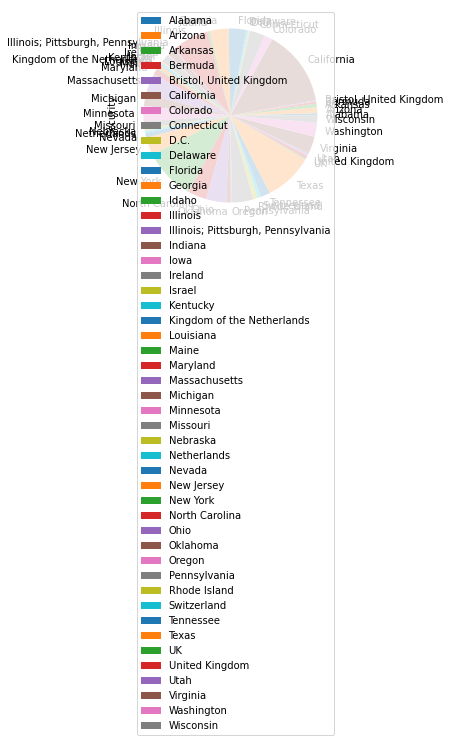

In [122]:
sp500.groupby(['hq']).count().plot(kind='pie', y='Security')

In [124]:
sp500.groupby(['hq']).count()["Symbol"]

hq
Alabama                                2
Arizona                                5
Arkansas                               3
Bermuda                                2
Bristol, United Kingdom                1
California                            65
Colorado                               7
Connecticut                           13
D.C.                                   1
Delaware                               2
Florida                               15
Georgia                               16
Idaho                                  2
Illinois                              31
Illinois; Pittsburgh, Pennsylvania     1
Indiana                                6
Iowa                                   1
Ireland                                7
Israel                                 1
Kentucky                               2
Kingdom of the Netherlands             1
Louisiana                              3
Maine                                  1
Maryland                               5
Massachusetts

In [126]:
new_df = pd.read_csv("https://ies-python-midterm.s3.eu-central-1.amazonaws.com/companies/companies_subindustry.csv")

In [128]:
pd.merge(sp500, new_df, on='Symbol')

,Symbol,Security,GICS Sector,hq,included,Founded,subindustry
0,MMM,3M,Industrials,Minnesota,09.08.1976,1902,Industrial Conglomerates
1,AOS,A. O. Smith,Industrials,Wisconsin,26.07.2017,1916,Building Products
2,ABT,Abbott,Health Care,Illinois,31.03.1964,1888,Health Care Equipment
3,ABBV,AbbVie,Health Care,Illinois,31.12.2012,2013 (1888),Pharmaceuticals
4,ABMD,Abiomed,Health Care,Massachusetts,31.05.2018,1981,Health Care Equipment
...,...,...,...,...,...,...,...
453,YUM,Yum! Brands,Consumer Discretionary,Kentucky,06.10.1997,1997,Restaurants
454,ZBRA,Zebra Technologies,Information Technology,Illinois,23.12.2019,1969,Electronic Equipment & Instruments
455,ZBH,Zimmer Biomet,Health Care,Indiana,07.08.2001,1927,Health Care Equipment
456,ZION,Zions Bancorporation,Financials,Utah,22.06.2001,1873,Regional Banks
